In [ ]:
pip install tensorflow

PENYIMPAN DATA GAMBAR

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

1.1 PENYIMPAN DIREKTORI DAN DATA

In [4]:
images_path = "/content/drive/MyDrive/DataSetCapstone"
train_path = "/train"
val_path = "/validation"
test_path = "/test"

In [5]:
subdirectories = [f.name for f in os.scandir(images_path+train_path) if f.is_dir()]

print("Daftar nama subdirektori:")
for subdir in subdirectories:
    print(subdir)

Daftar nama subdirektori:
Soto Banjar
Babi Guling
Sate Ulat Sagu
Es Pisang Ijo
Kerak Telor
Rendang


In [6]:
# fungsi untuk menampilkan contoh gambar secara acak
def view_random_image(data_dir, class_dir, n_row=1, n_col=1):
    target_dir = images_path + "/" + data_dir + "/" + class_dir + "/"

    rand_images = random.sample(os.listdir(target_dir), 4)

    fig, axs = plt.subplots(n_row, n_col)

    for i, ax in enumerate(axs.flat):
        img = mpimg.imread(target_dir + rand_images[i])
        ax.imshow(img)
        ax.set_title(f"{class_dir} {i+1}\n{img.shape}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

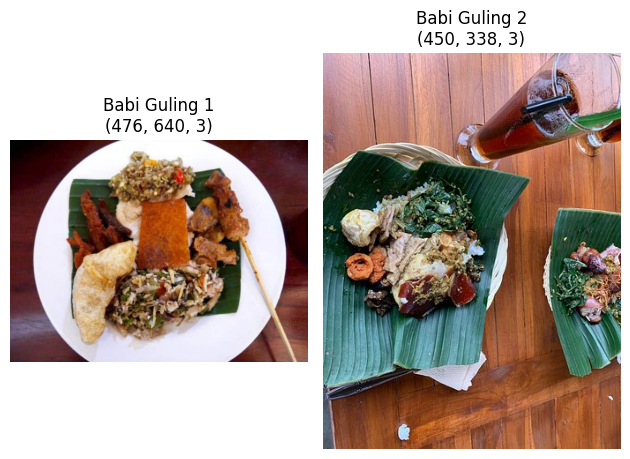

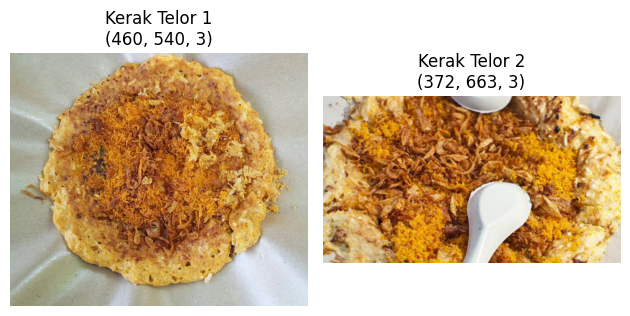

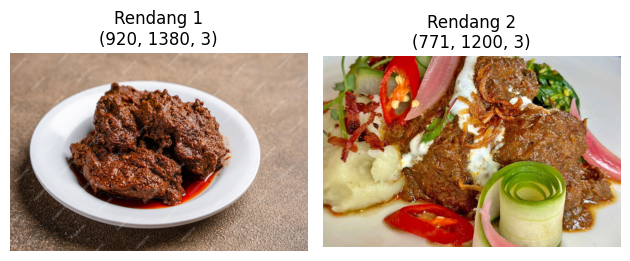

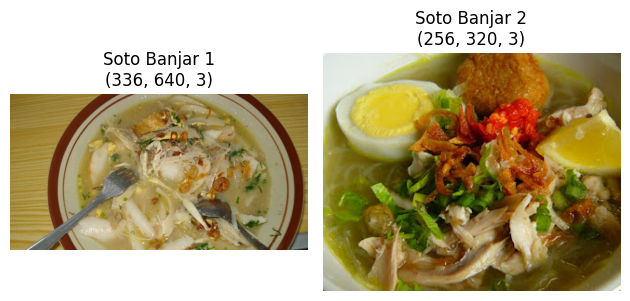

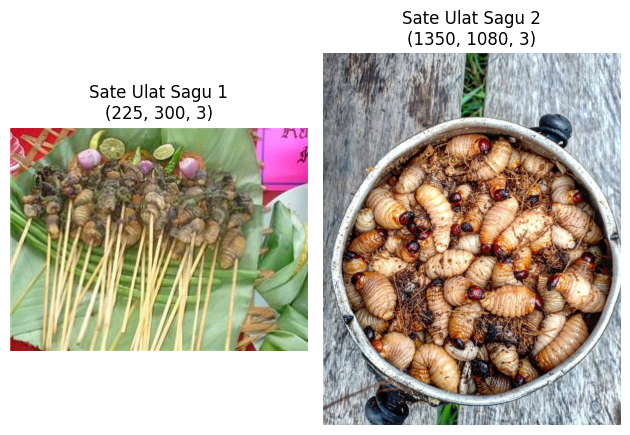

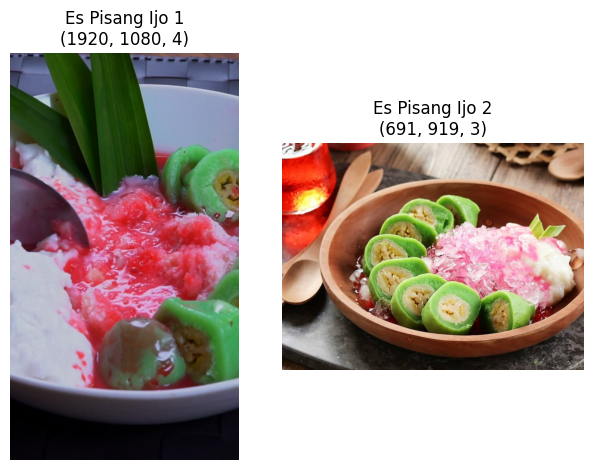

In [7]:
# contoh menampilkan gambar secara acak
view_random_image("train", "Babi Guling", 1, 2)
view_random_image("train", "Kerak Telor", 1, 2)
view_random_image("train", "Rendang", 1, 2)
view_random_image("train", "Soto Banjar", 1, 2)
view_random_image("train", "Sate Ulat Sagu", 1, 2)
view_random_image("train", "Es Pisang Ijo", 1, 2)

1.2 AUGMENTASI

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
tf.random.set_seed(42)

# pengaturan data training dengan berbagai augmentasi
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# pengaturan data validasi selama pelatihan
val_datagen = ImageDataGenerator(rescale=1./255)

# pengaturan data uji untuk evaluasi model
test_datagen = ImageDataGenerator(rescale=1./255)

# menentukan ukuran gambar untuk proses pelatihan
img_size = (224, 224)

# menyiapkan data training dengan pengaturan yang sudah ditentukan
train_data = train_datagen.flow_from_directory(images_path + train_path,
                                               target_size=img_size,
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

 # menyiapkan data validasi
val_data = val_datagen.flow_from_directory(images_path + val_path,
                                           target_size=img_size,
                                           batch_size=32,
                                           class_mode='categorical',
                                           seed=42)

# menyiapkan data uji
test_data = test_datagen.flow_from_directory(images_path + test_path,
                                             target_size=img_size,
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)

Found 861 images belonging to 6 classes.
Found 218 images belonging to 6 classes.
Found 6 images belonging to 6 classes.


MEMBUAT MODEL

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(
    Conv2D(filters=20, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3))
)
model_1.add(Conv2D(20, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2), padding="valid"))

model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(6, activation="softmax"))  # Adjust to match number of classes

# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)

# Assuming train_data and val_data are preprocessed and ready
history_1 = model_1.fit(
        train_data,
        validation_data=val_data,
        epochs=100,
)

Epoch 1/100
27/27 [==============================] - 256s 9s/step - loss: 1.8264 - accuracy: 0.2311 - val_loss: 1.6569 - val_accuracy: 0.2982
Epoch 2/100
27/27 [==============================] - 170s 6s/step - loss: 1.4852 - accuracy: 0.3961 - val_loss: 1.4910 - val_accuracy: 0.4908
Epoch 3/100
27/27 [==============================] - 171s 6s/step - loss: 1.2787 - accuracy: 0.5296 - val_loss: 1.4352 - val_accuracy: 0.5321
Epoch 4/100
27/27 [==============================] - 171s 6s/step - loss: 1.1428 - accuracy: 0.5668 - val_loss: 1.0815 - val_accuracy: 0.5550
Epoch 5/100
27/27 [==============================] - 175s 6s/step - loss: 1.1331 - accuracy: 0.5761 - val_loss: 1.2989 - val_accuracy: 0.5413
Epoch 6/100
27/27 [==============================] - 176s 6s/step - loss: 0.9282 - accuracy: 0.6678 - val_loss: 0.7837 - val_accuracy: 0.7385
Epoch 7/100
27/27 [==============================] - 180s 7s/step - loss: 0.9651 - accuracy: 0.6469 - val_loss: 1.0667 - val_accuracy: 0.6376
Epoch 

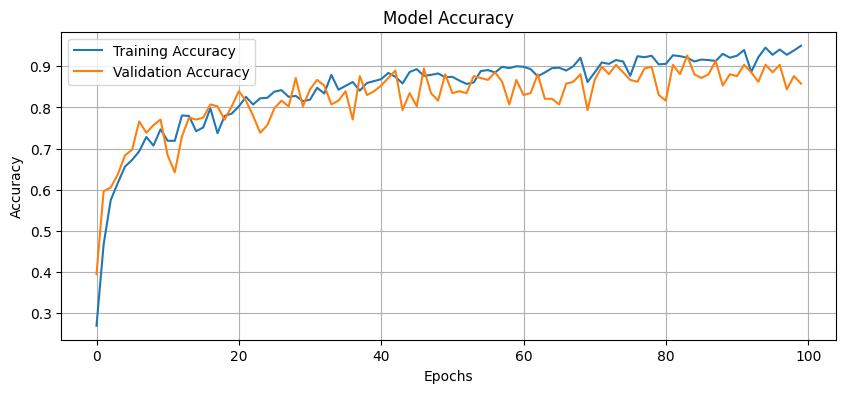

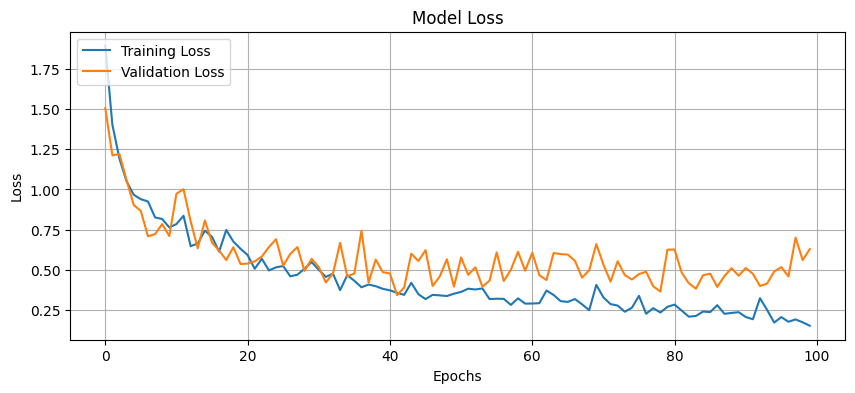

In [ ]:
import matplotlib.pyplot as plt

# Membuat plot akurasi model
plt.figure(figsize=(10, 4))
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Membuat plot loss model
plt.figure(figsize=(10, 4))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
model_1.save("v2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_1.save("v2.keras")

In [ ]:
import tensorflow as tf

# Konversi model Keras menjadi TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model_1)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Jika Anda menggunakan Google Colab dan ingin mengunduh file .tflite
from google.colab import files
files.download('model.tflite')

In [ ]:
from keras.models import model_from_json
from google.colab import files

# Simpan arsitektur model dalam format .json
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# Unduh model .json
files.download('model.json')